# Finetuned MOBILEBERT UNCASED


// Preparation of labels ['O', 'B-DEP', 'I-DEP', 'B-ARR', 'I-ARR']
-> mapping labels and ids:  {'B-ARR': 0, 'B-DEP': 1, 'I-ARR': 2, 'I-DEP': 3, 'O': 4}


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MobileBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.



// Starting train data encoding...

---> Ligne 1
- Original sentence:  montre-moi les trains dimanche allant de Jarville-la-Malgrange à La Bassée-Violaines en première classe sans correspondance partant l'après midi
- Encoded tokens:  ['[CLS]', 'mont', '##re', '-', 'moi', 'les', 'trains', 'dim', '##an', '##che', 'allan', '##t', 'de', 'jar', '##ville', '-', 'la', '-', 'mal', '##gra', '##nge', 'a', 'la', 'bass', '##ee', '-', 'viola', '##ines', 'en', 'premiere', 'class', '##e', 'sans', 'correspond', '##ance', '[SEP]']
- Labels after encoding the entities:  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DEP', 'I-DEP', 'I-DEP', 'I-DEP', 'I-DEP', 'I-DEP', 'I-DEP', 'I-DEP', 'O', 'B-ARR', 'I-ARR', 'I-ARR', 'I-ARR', 'I-ARR', 'I-ARR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
- Label IDs [4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 3 3 3 3 3 3 4 0 2 2 2 2 2 4 4 4 4 4 4 4 4]

---> Ligne 2
- Original sentence:  quels trains voyagent d'Alençon à Corbeil-Essonnes
- Encoded tokens:  ['[CLS]', 

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFMobileBertForTokenClassification: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFMobileBertForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMobileBertForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFMobileBertForTokenClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMobileBertForTokenClassification for predictions without further training.
Some weights of TFMobileBertForTokenClassification were not initialized from

-> model loaded with  5 labels

// Starting model training...
Epoch 1/10
24/24 [==============================] - 118s 1s/step - loss: 1.0818 - accuracy: 0.6627 - val_loss: 0.5853 - val_accuracy: 0.7963
Epoch 2/10
24/24 [==============================] - 14s 581ms/step - loss: 0.5020 - accuracy: 0.8103 - val_loss: 0.3646 - val_accuracy: 0.8646
Epoch 3/10
24/24 [==============================] - 14s 593ms/step - loss: 0.3464 - accuracy: 0.8720 - val_loss: 0.1895 - val_accuracy: 0.9410
Epoch 4/10
24/24 [==============================] - 13s 559ms/step - loss: 0.2314 - accuracy: 0.9204 - val_loss: 0.1052 - val_accuracy: 0.9699
Epoch 5/10
24/24 [==============================] - 14s 567ms/step - loss: 0.1534 - accuracy: 0.9497 - val_loss: 0.0560 - val_accuracy: 0.9838
Epoch 6/10
24/24 [==============================] - 13s 544ms/step - loss: 0.1081 - accuracy: 0.9671 - val_loss: 0.0448 - val_accuracy: 0.9838
Epoch 7/10
24/24 [==============================] - 13s 556ms/step - loss: 0.0866 

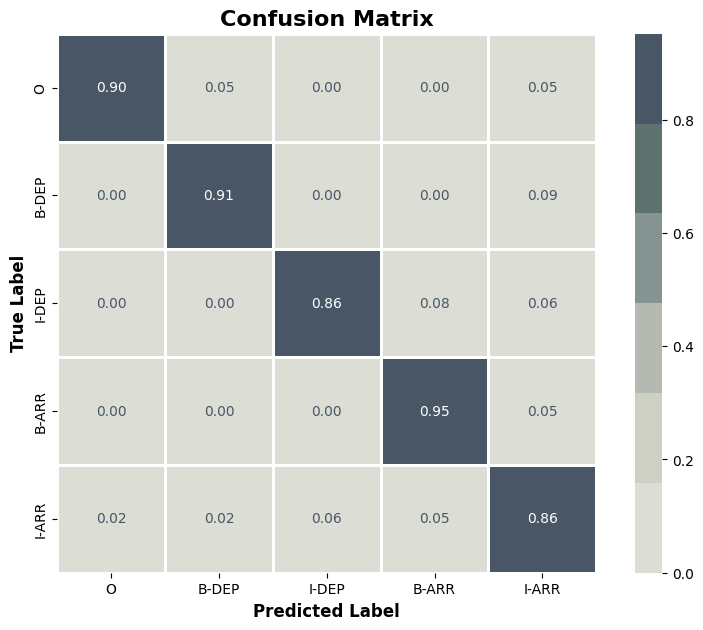


Confusion Matrix:
[[  18    1    0    0    1]
 [   0   20    0    0    2]
 [   0    0   55    5    4]
 [   0    0    0   79    4]
 [  29   29   95   74 1348]]

Classification Report:
              precision    recall  f1-score   support

           O       0.38      0.90      0.54        20
       B-DEP       0.40      0.91      0.56        22
       I-DEP       0.37      0.86      0.51        64
       B-ARR       0.50      0.95      0.66        83
       I-ARR       0.99      0.86      0.92      1575

    accuracy                           0.86      1764
   macro avg       0.53      0.90      0.64      1764
weighted avg       0.93      0.86      0.88      1764


Evolution of accuracy and loss over the epoch:


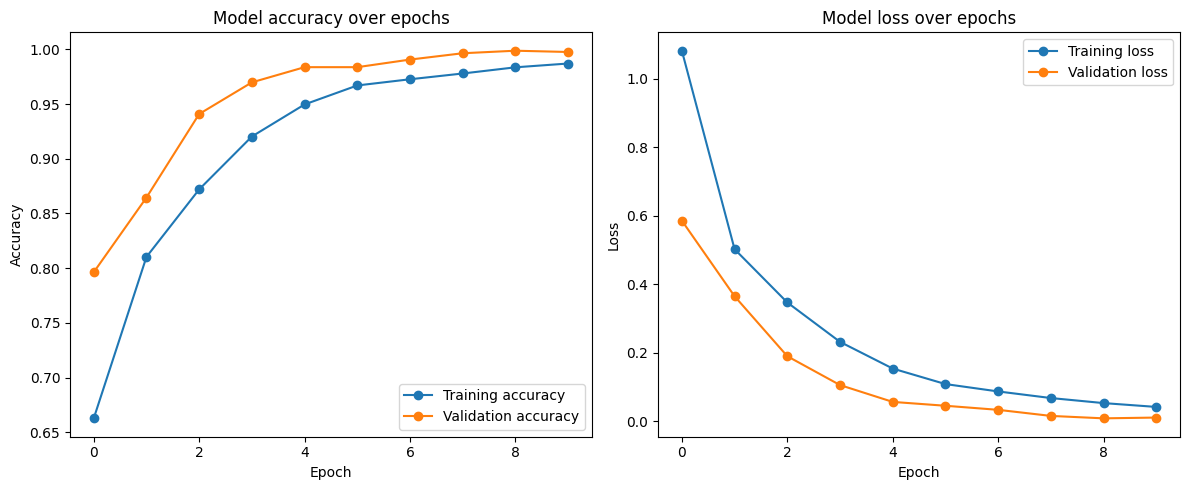

In [1]:
import os
import warnings
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizerFast, TFMobileBertForTokenClassification
from sklearn.preprocessing import LabelEncoder

from dotenv import load_dotenv
from utils import encode_data, get_metrics

load_dotenv()
huggingface_token = os.environ.get('HUGGINGFACEHUB_API_TOKEN')
if not huggingface_token:
    raise ValueError("HUGGINGFACEHUB_API_TOKEN n'a pas été trouvé -> vérifier le .env")


notebook_dir = os.getcwd()
data_dir = os.path.join(notebook_dir, '..', '..', 'data')
datasets = {file_name: os.path.join(data_dir, file_name) for file_name in os.listdir(data_dir) 
            if os.path.isfile(os.path.join(data_dir, file_name))}

train_path = datasets.get('reservation-first-dataset-train.csv')
test_path = datasets.get('reservation-first-dataset-test.csv')

data_train = pd.read_csv(train_path).fillna('')
data_test = pd.read_csv(test_path).fillna('')


print("\n// Preparation of labels ['O', 'B-DEP', 'I-DEP', 'B-ARR', 'I-ARR']")
unique_labels = ['O', 'B-DEP', 'I-DEP', 'B-ARR', 'I-ARR']
label_encoder = LabelEncoder()
label_encoder.fit(unique_labels)
print("-> mapping labels and ids: ", {label: idx for idx, label in enumerate(label_encoder.classes_)})

tokenizer = BertTokenizerFast.from_pretrained('SKNahin/NER_MobileBert', token=huggingface_token)

print("\n// Starting train data encoding...")
train_tokens, train_labels = encode_data(data_train, tokenizer, label_encoder, max_length=36)
print("\n// Starting test data encoding...")
test_tokens, test_labels = encode_data(data_test, tokenizer, label_encoder, max_length=36)

##################
# Model training #
##################

model = TFMobileBertForTokenClassification.from_pretrained(
    'SKNahin/NER_MobileBert',
    num_labels=len(unique_labels),
    ignore_mismatched_sizes=True,
    token=huggingface_token
)
print("-> model loaded with ", len(unique_labels), "labels")

# configuration
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
print("\n// Starting model training...")
history = model.fit(train_tokens, train_labels, epochs=10, batch_size=9, validation_split=0.1) # training

##############
# Model Save #
##############
model_path = os.path.join(os.getcwd(), '..', '..', 'model', 'models', 'NER_MobileBert')
absolute_model_path = os.path.abspath(model_path)

model.save_pretrained(absolute_model_path)  # model
tokenizer.save_pretrained(absolute_model_path)  # tokenizer

####################
# Model Evaluation #
####################
evaluation_results = model.evaluate(test_tokens, test_labels)
print("Evaluation results:", evaluation_results)

test_predictions = model.predict(test_tokens).logits
predicted_labels = np.argmax(test_predictions, axis=-1).flatten()
true_labels = test_labels.flatten() 

get_metrics(true_labels, predicted_labels, unique_labels, history=history)



ROC multiclasses curve:


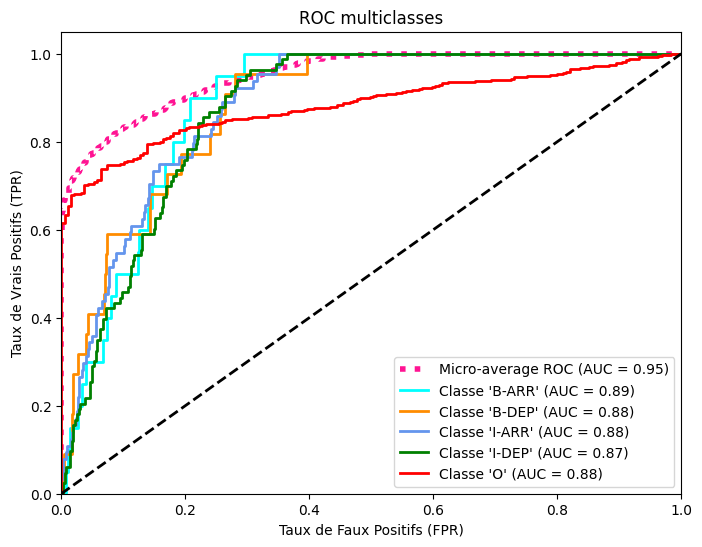

In [4]:
import os
import warnings
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")
import tensorflow as tf

from utils import get_ROC_curve

get_ROC_curve(true_labels=test_labels, logits=test_predictions, unique_labels=unique_labels)
